<a href="https://colab.research.google.com/github/sidneyjunior0811/Python/blob/main/Advertising_Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando Módulos



In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [69]:
df = pd.read_csv('/content/drive/MyDrive/advertising.csv')

In [70]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


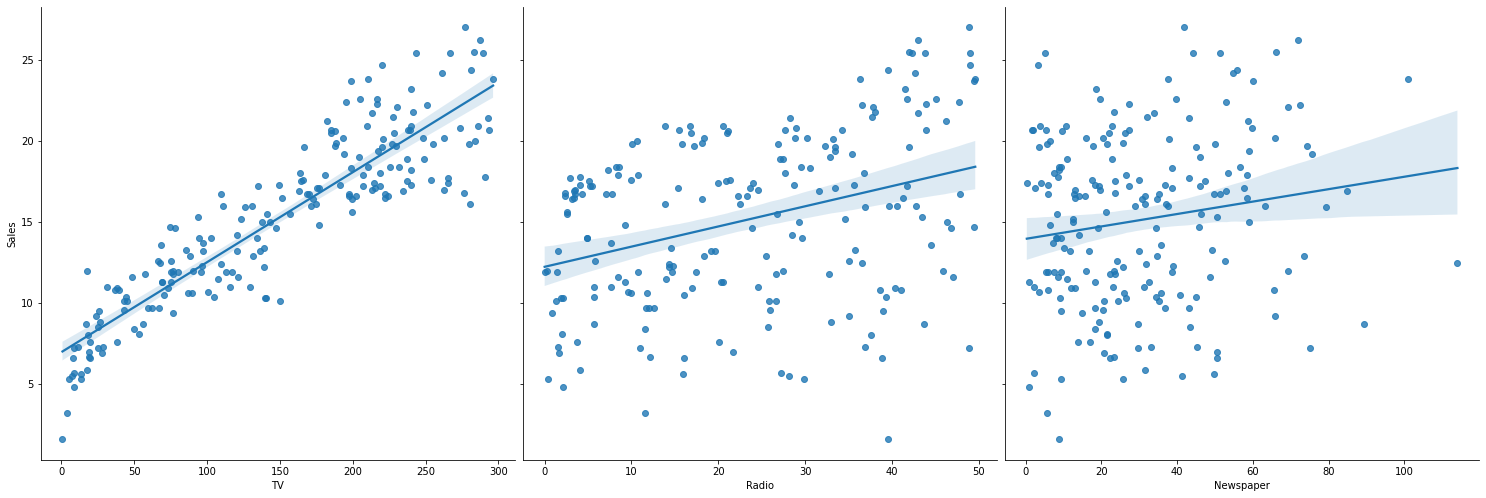

In [71]:
sns.pairplot(df, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars='Sales', size = 7, kind='reg')

### Criando Variáveis

In [72]:
testes = [['TV', 'Radio', 'Newspaper'], ['Radio', 'Newspaper'], ['TV', 'Newspaper'], ['TV', 'Radio']]
vencedor = {'teste': '', 'performance': None}
primeira_passagem = True

### LOOP para realizar os testes

In [73]:
for teste in testes:
  x = df[teste]
  y = df['Sales']
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, random_state = 5)
  reglin = LinearRegression()
  reglin.fit(x_train, y_train)
  previsao = reglin.predict(x_test)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, previsao))
  print('teste: ')
  print(teste)
  print('performance: ')
  print(rmse)
  print('----------------------')
  

teste: 
['TV', 'Radio', 'Newspaper']
performance: 
1.3570956388868882
----------------------
teste: 
['Radio', 'Newspaper']
performance: 
4.883915543206654
----------------------
teste: 
['TV', 'Newspaper']
performance: 
1.9214277085717903
----------------------
teste: 
['TV', 'Radio']
performance: 
1.3549049897062917
----------------------


### IF para sabermos qual das três informações é a mais Viável

In [74]:
if (primeira_passagem):
      vencedor['teste'] = teste
      vencedor['performance'] = rmse
      primeira_pessoa = False
else:
    if (rmse < vencedor['performance']):
      vencedor['teste'] = teste
      vencedor['performance'] = rmse
  
print('----------------------')
print('Vencedor: ')
print(teste)
print('Performance do vencedor: ')
print(rmse)

----------------------
Vencedor: 
['TV', 'Radio']
Performance do vencedor: 
1.3549049897062917
